# Ejercicio sobre contenidos de los vinos

Vamos a hacer un analisis de los datos relevados a tres clases de vinos cultivados en la misma region de Italia.

Las tres clases de vinos fueron sometidas analisis quimicos, donde se midieron un total de 13 caracteristicas.

## Datos

Los datos se pueden descargar de https://archive.ics.uci.edu/ml/datasets/wine

## Objetivo

* Analizar los resultados de los analisis quimicos a tres clases de vino
* Armar un modelo que permita predecir la clase a la que pertenece un vino, conociendo sus 13 caracteristicas quimicas.

Preguntas:
* Son todas importantes por igual?
    * Cuales son las mas importantes
* Que modelos podria aplicar?
    * Supervisado, No supervisado, Refuerzo
* Como es la calidad de los datos?
    * Que tipo de limpieza hay que aplicar?

## Procedimiento

1) Importar las librerias necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

2) Leer los datos de los componentes de los vinos

3) Ver los datos. Falta algo?

In [2]:
nombres = ["Clase","Alcohol", "Malic acid", "Ash", "Alcalinity of ash","Magnesium",
           "Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins",
           "Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
df = pd.read_csv("Datasets/wine.data",header = None, names = nombres)

In [3]:
df.head()

,Clase,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


4) Completar lo que falta en el punto 3)

**Faltaban los titulos de columna y la Clase**

5) Ver estadisticas de los datos. 
    Media, mediana, quartiles, nulos, min, max, etc.
    Variables numericas, categoricas, texto?
    
5b) Si hay variables categoricas, hacer un barplot que muestre cuantas hay de cada una de ellas.

In [4]:
df.describe()

,Clase,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
z = df.Clase.value_counts()

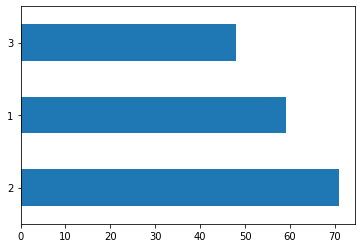

In [6]:
z.plot.barh()

6) Analizar outliers y nulos. 
    Hacer boxplots de las variables numericas

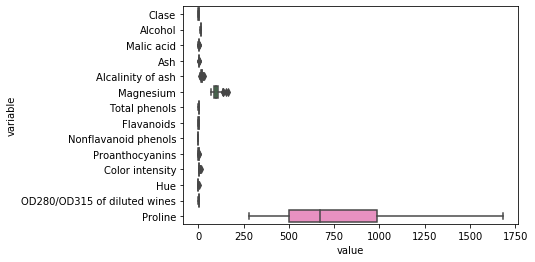

In [7]:
sns.boxplot(y="variable", x="value", data=pd.melt(df))

In [8]:
df.columns

Index(['Clase', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

C:\Users\user\Anaconda3\envs\AcamicaDs1\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\user\Anaconda3\envs\AcamicaDs1\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


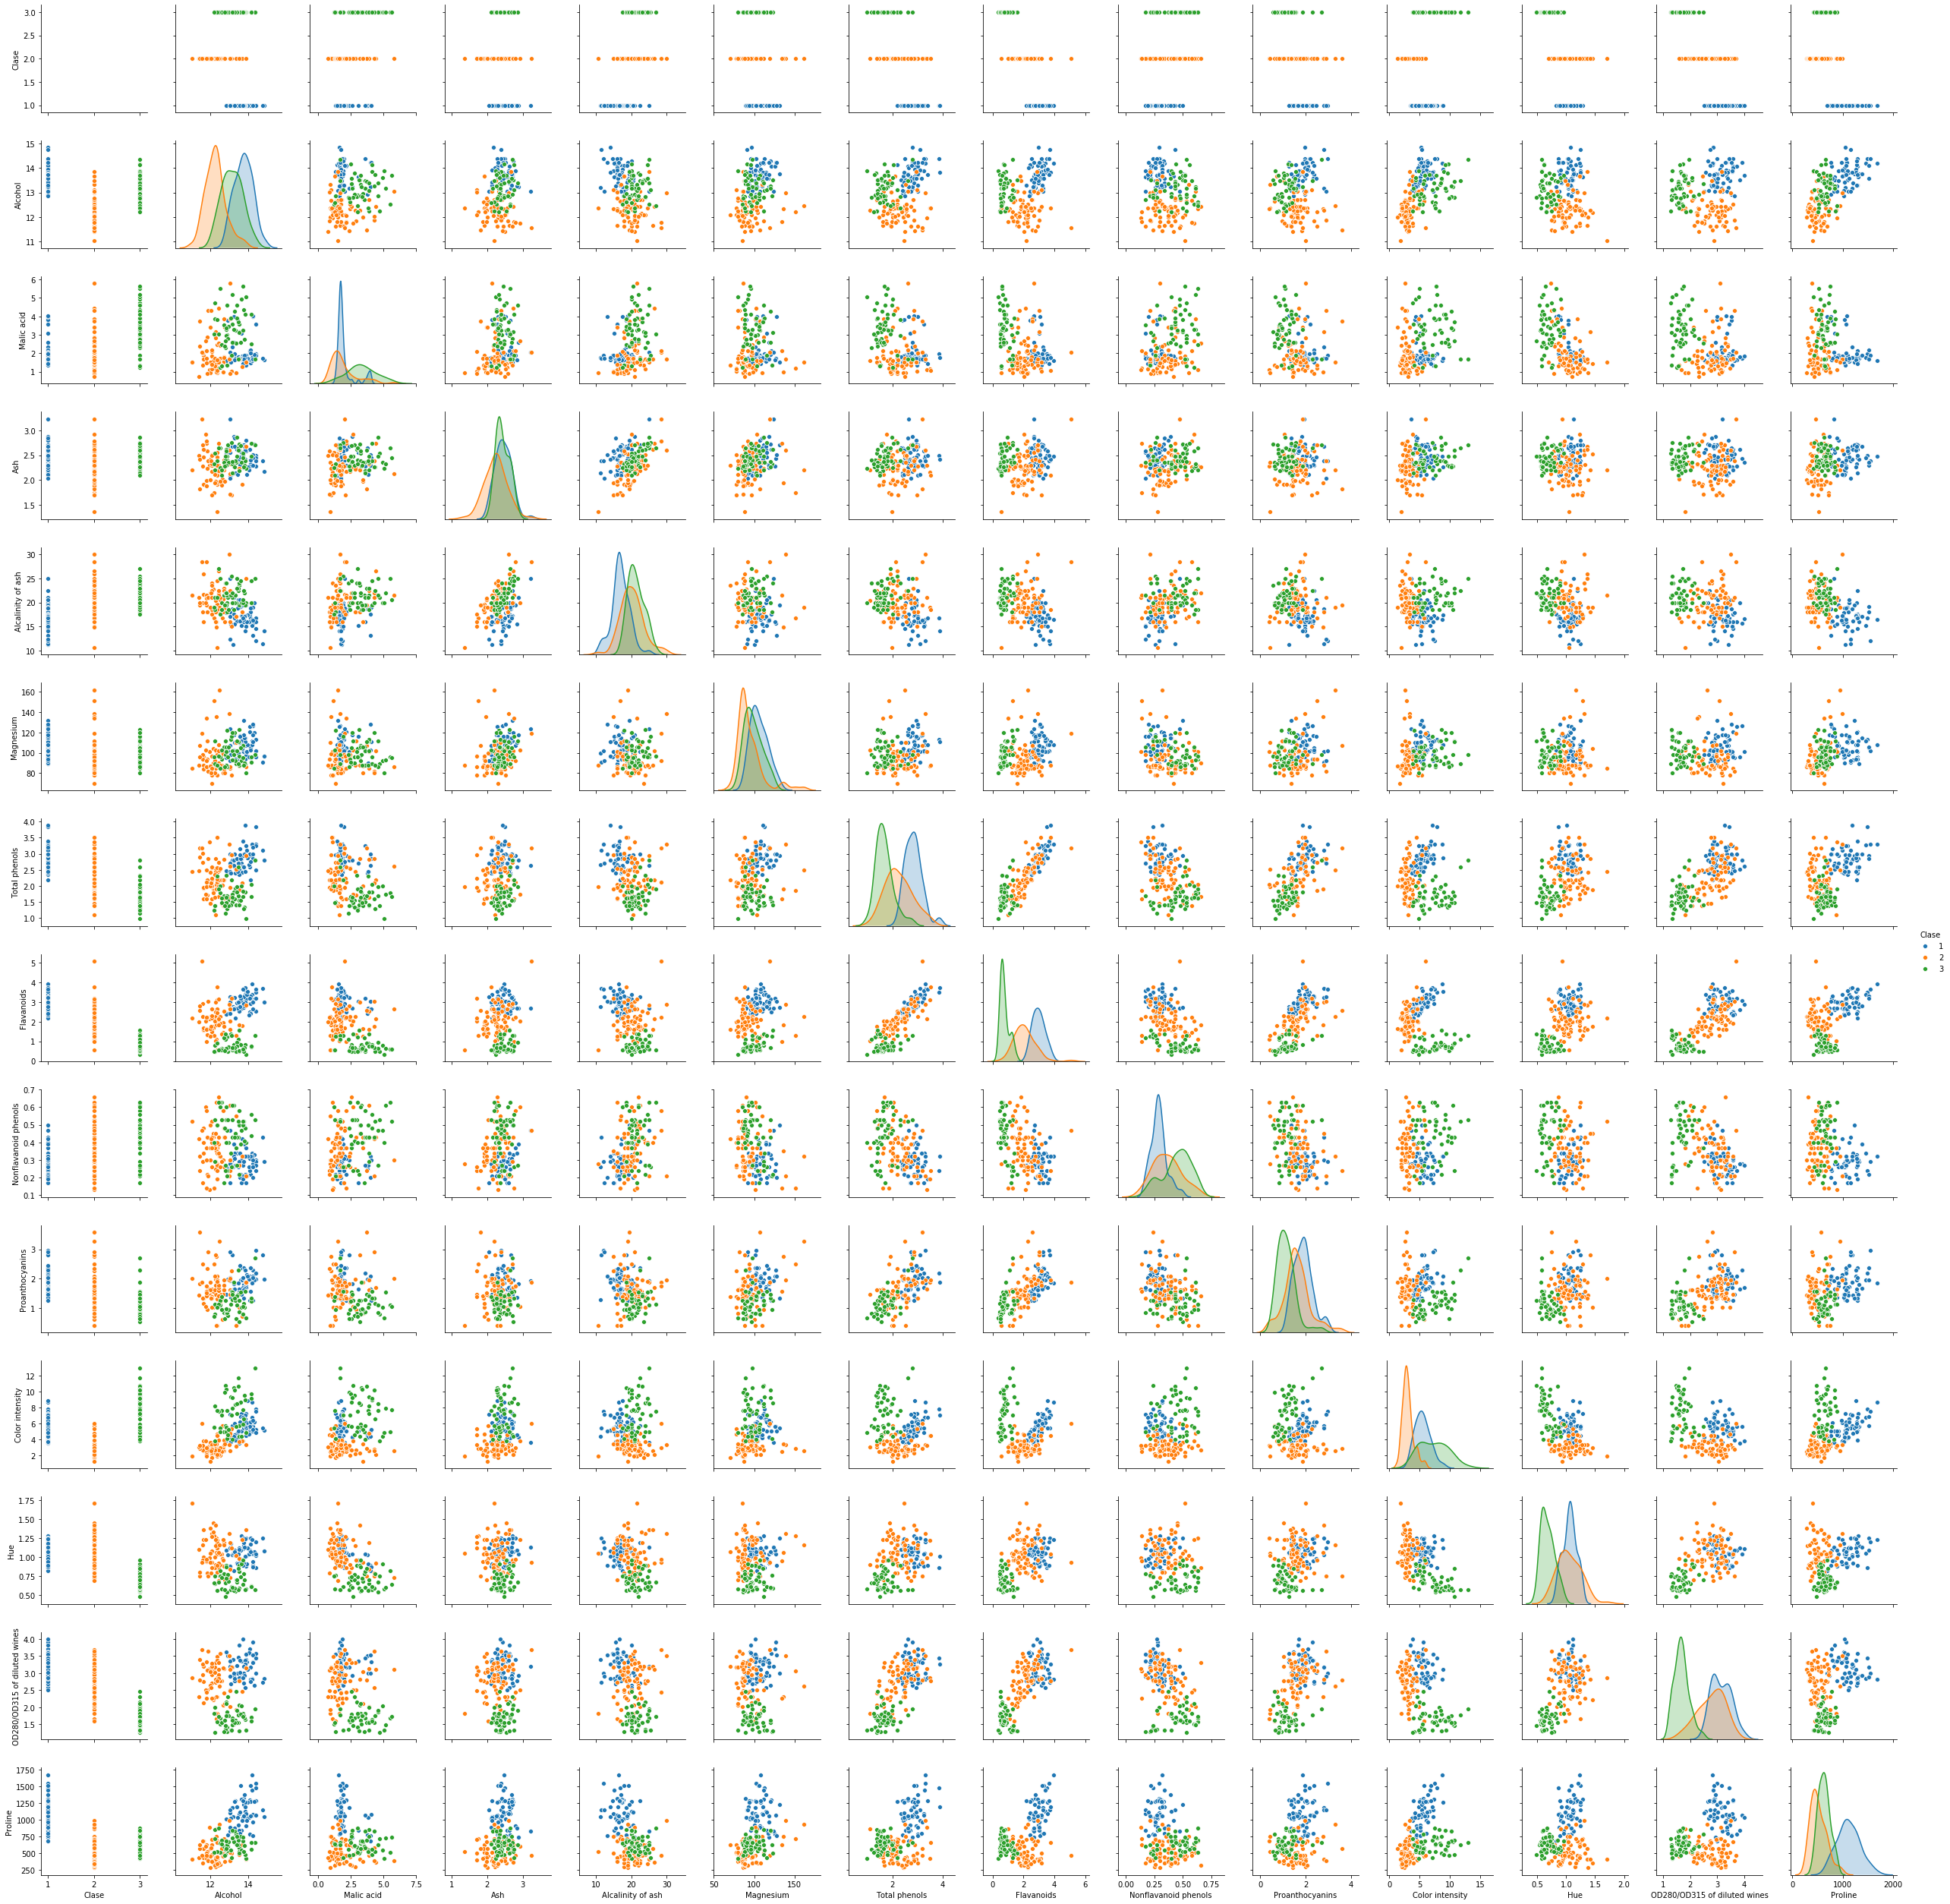

In [9]:
sns.pairplot(df, hue='Clase')

## Clasificacion con KNN

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

### Selecciono par de columnas

Elijo:
* Alcalinity of Ash
* Hue

In [11]:
X = np.array(df.loc[:,['Magnesium', 'Flavanoids']])
y = np.array(df['Clase'])

C:\Users\user\Anaconda3\envs\AcamicaDs1\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\user\Anaconda3\envs\AcamicaDs1\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


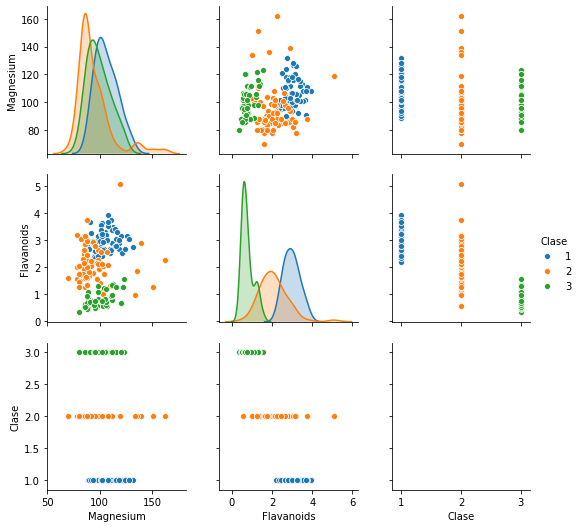

In [12]:
sns.pairplot(df.loc[:,['Magnesium', 'Flavanoids','Clase']], hue='Clase')

### Normalizo los inputs (de -1 a 1)

In [13]:
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

In [14]:
X -= np.mean(X, axis=0)
X /= np.ptp(X, axis=0)

In [15]:
n_neighbors = 10

Graficando zonas

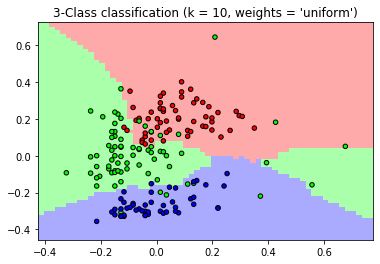

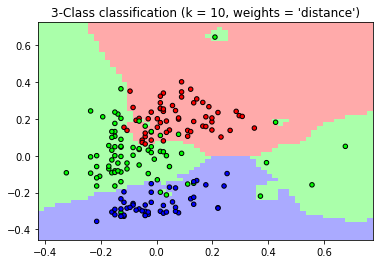

In [16]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [17]:
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)
y_pred = clf.predict(X)

In [18]:
X.mean()

9.979532805619384e-18

In [19]:
pd.crosstab(y,clf.predict(X))

col_0,1,2,3
row_0,,,
1,56,3,0
2,10,55,6
3,0,2,46


## Comparacion entre varios modelos de clasificacion

Los modelos que se comparan son:
* Decision Tree Classifier
* KNN
* SVC
* Voting Classifier (votan los 3 previos)

In [22]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


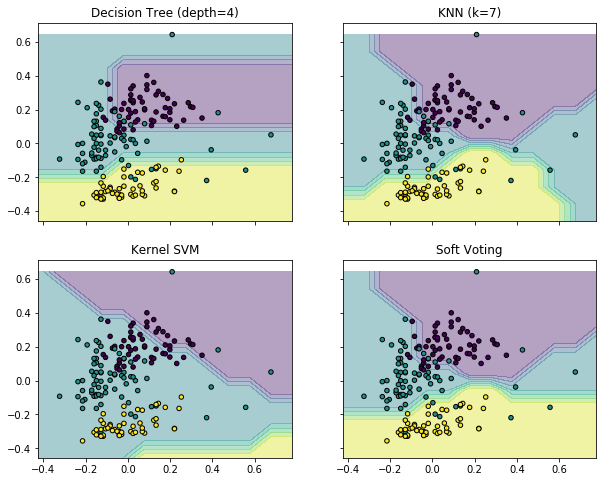

In [23]:
# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 2, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()